Evaluation Project - 7
Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/DSData/blob/master/Telecom_customer_churn.csv

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')


In [2]:
#importing CSV file
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.columns
df.head

<bound method NDFrame.head of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL   

so we have total  7043 rows and 21 columns
out of which we can see 18 object, 2 int and 1 float
we can see column total charge data typr is object but its numerical
and senior citizens is categorical value but its numnercal listed
and we dont need the customer id to anaylies our data so we can drop this column


In [6]:
df.drop(['customerID'],axis=1,inplace=True)

In [7]:
df['SeniorCitizen']= df['SeniorCitizen'].astype(object)

In [8]:
#now we are going to split the numereical and categorical columns
Cat = [ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod','SeniorCitizen', 'Churn']
Num = ['tenure','MonthlyCharges','TotalCharges']

In [9]:
#now we are going to do data cleaning and find out the missing values
df.duplicated().sum()

22

In [10]:
df.drop_duplicates(keep='last',inplace= True)

In [11]:
df.shape

(7021, 20)

In [12]:
#now we are going to check any spaces, - , NA
df.isin([' ','NA','-']).sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
#we can see we have something in Total charges column
df['TotalCharges'].isin(['-']).sum().any()


False

In [14]:
df['TotalCharges'].isin([' ']).sum().any()


True

In [15]:
df['TotalCharges'].isin(['NA']).sum().any()

False

In [16]:
#now we are going to change spcaes to Null values
df['TotalCharges']= df['TotalCharges'].replace(' ',np.nan)

In [17]:
# as Total charge columns is fine now we need to make this in float as its not object
df['TotalCharges']= df['TotalCharges'].astype(float)

In [18]:
missing = df.isnull().sum().sort_values(ascending = False)
percentage_missing =(missing/len(df))*100
print(pd.concat([missing, percentage_missing], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
TotalCharges                  11        0.156673
gender                         0        0.000000
SeniorCitizen                  0        0.000000
MonthlyCharges                 0        0.000000
PaymentMethod                  0        0.000000
PaperlessBilling               0        0.000000
Contract                       0        0.000000
StreamingMovies                0        0.000000
StreamingTV                    0        0.000000
TechSupport                    0        0.000000
DeviceProtection               0        0.000000
OnlineBackup                   0        0.000000
OnlineSecurity                 0        0.000000
InternetService                0        0.000000
MultipleLines                  0        0.000000
PhoneService                   0        0.000000
tenure                         0        0.000000
Dependents                     0        0.000000
Partner                        0        0.000000
Churn               

In [19]:
df['TotalCharges'].fillna(df['TotalCharges'].median(),inplace=True)

In [20]:
df['TotalCharges'].isnull().sum()

0

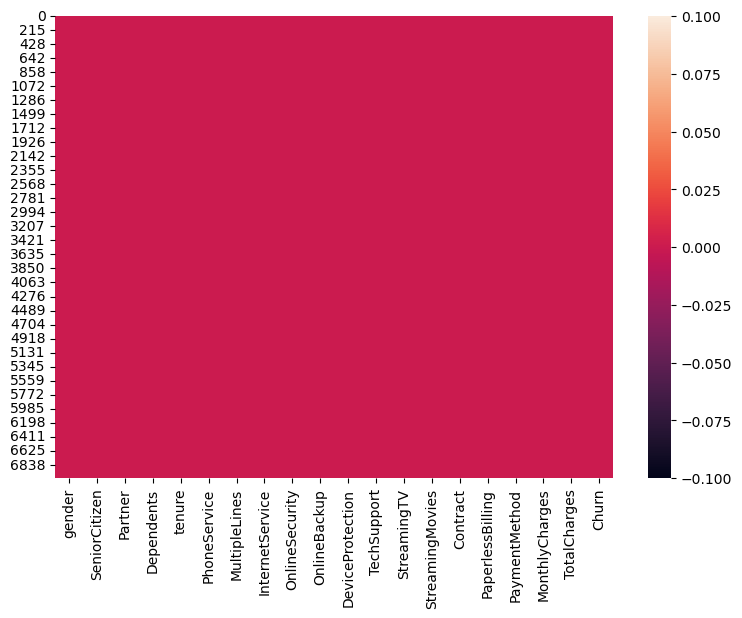

In [21]:
plt.figure(figsize=(9,6))
sns.heatmap(df.isnull())
plt.show()

no missing values


In [22]:
df[Cat].describe().T

,count,unique,top,freq
gender,7021,2,Male,3541
Partner,7021,2,No,3619
Dependents,7021,2,No,4911
PhoneService,7021,2,Yes,6339
MultipleLines,7021,3,No,3368
InternetService,7021,3,Fiber optic,3090
OnlineSecurity,7021,3,No,3490
OnlineBackup,7021,3,No,3080
DeviceProtection,7021,3,No,3087
TechSupport,7021,3,No,3465


In [23]:
df[Num].describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7021.0,32.469449,24.534965,0.00,9.00,29.000,55.0,72.00
MonthlyCharges,7021.0,64.851894,30.069001,18.25,35.75,70.400,89.9,118.75
TotalCharges,7021.0,2288.964517,2265.315517,18.80,411.15,1403.875,3801.7,8684.80


In [24]:
#now we need to check the values of categorical data
for i in Cat:
    print(i)
    print(df[i].value_counts())
    print("="*100)

gender
Male      3541
Female    3480
Name: gender, dtype: int64
Partner
No     3619
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4911
Yes    2110
Name: Dependents, dtype: int64
PhoneService
Yes    6339
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: InternetService, dtype: int64
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: OnlineBackup, dtype: int64
DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: DeviceProtection, dtype: int64
TechSupport
No                     3465
Yes                    2044
No internet service    1512
Name: T

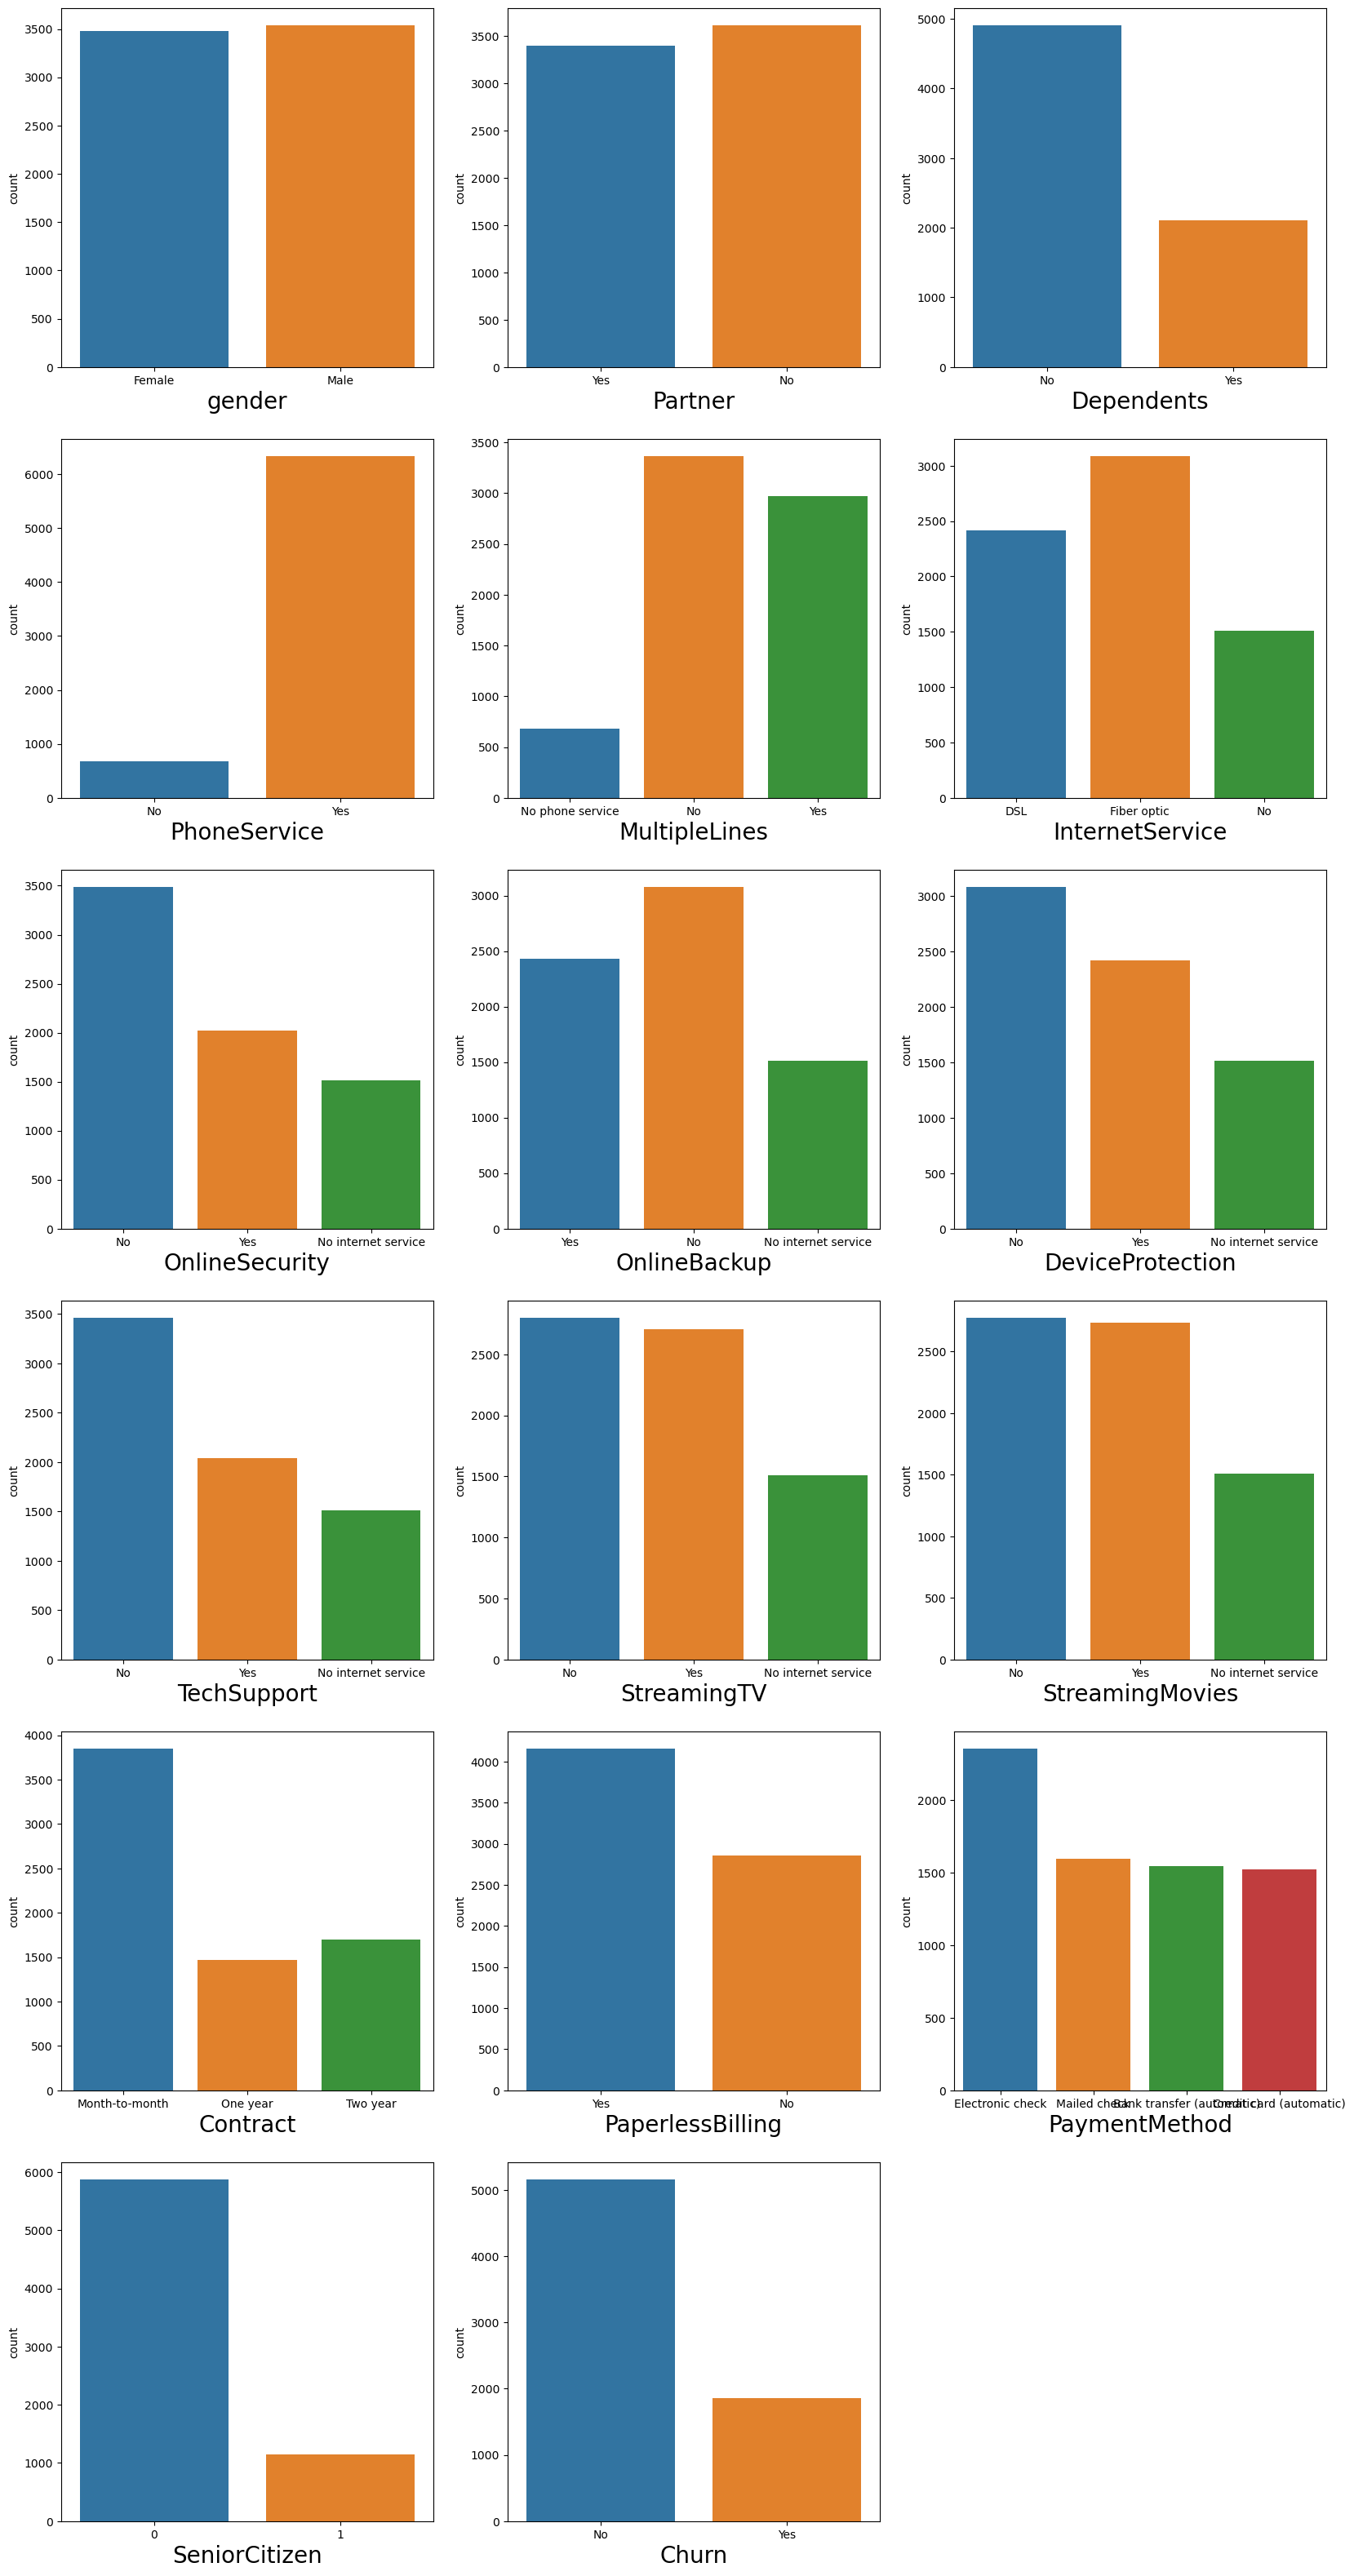

In [25]:
#sns.set_palette('hsv')
plt.figure(figsize=(20,40))
plotnumber =1
for i in Cat:
    if plotnumber <=17:
        ax = plt.subplot(6,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

In [26]:
Num =['tenure','MonthlyCharges', 'TotalCharges']

In [27]:
Cat =['gender', 'Partner','PhoneService', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [28]:
#now we are going to do Lable encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Cat:
    df[i] = le.fit_transform(df[i])
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


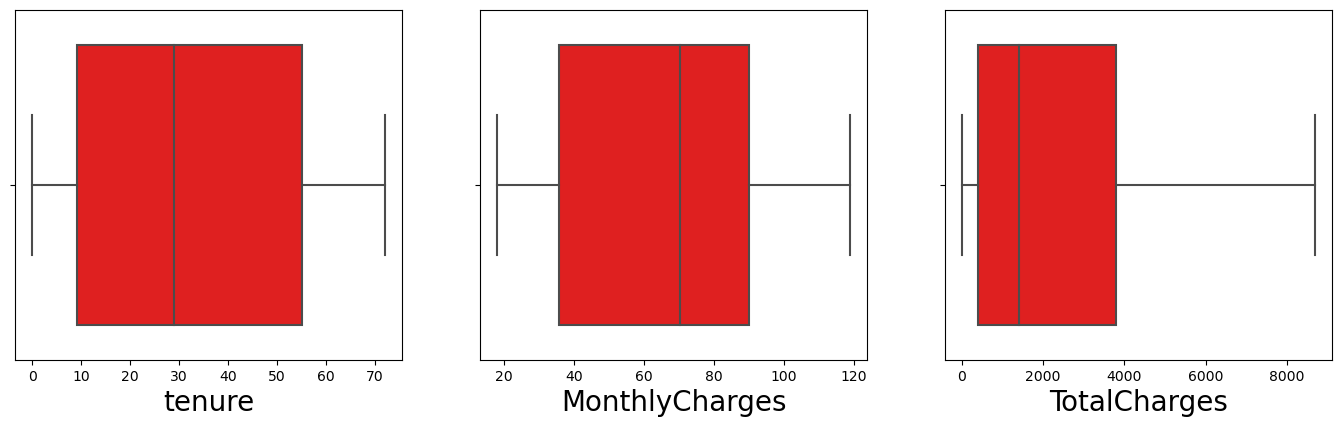

In [29]:
#now we are going to find out the outliers and remove them
plt.figure(figsize=(17,10),facecolor='white')
plotnumber=1
for column in Num:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

we dont have any outliers

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7021 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7021 non-null   int32  
 1   SeniorCitizen     7021 non-null   object 
 2   Partner           7021 non-null   int32  
 3   Dependents        7021 non-null   int32  
 4   tenure            7021 non-null   int64  
 5   PhoneService      7021 non-null   int32  
 6   MultipleLines     7021 non-null   int32  
 7   InternetService   7021 non-null   int32  
 8   OnlineSecurity    7021 non-null   int32  
 9   OnlineBackup      7021 non-null   int32  
 10  DeviceProtection  7021 non-null   int32  
 11  TechSupport       7021 non-null   int32  
 12  StreamingTV       7021 non-null   int32  
 13  StreamingMovies   7021 non-null   int32  
 14  Contract          7021 non-null   int32  
 15  PaperlessBilling  7021 non-null   int32  
 16  PaymentMethod     7021 non-null   int32  


In [31]:
df.drop(['PhoneService'],axis=1,inplace=True)

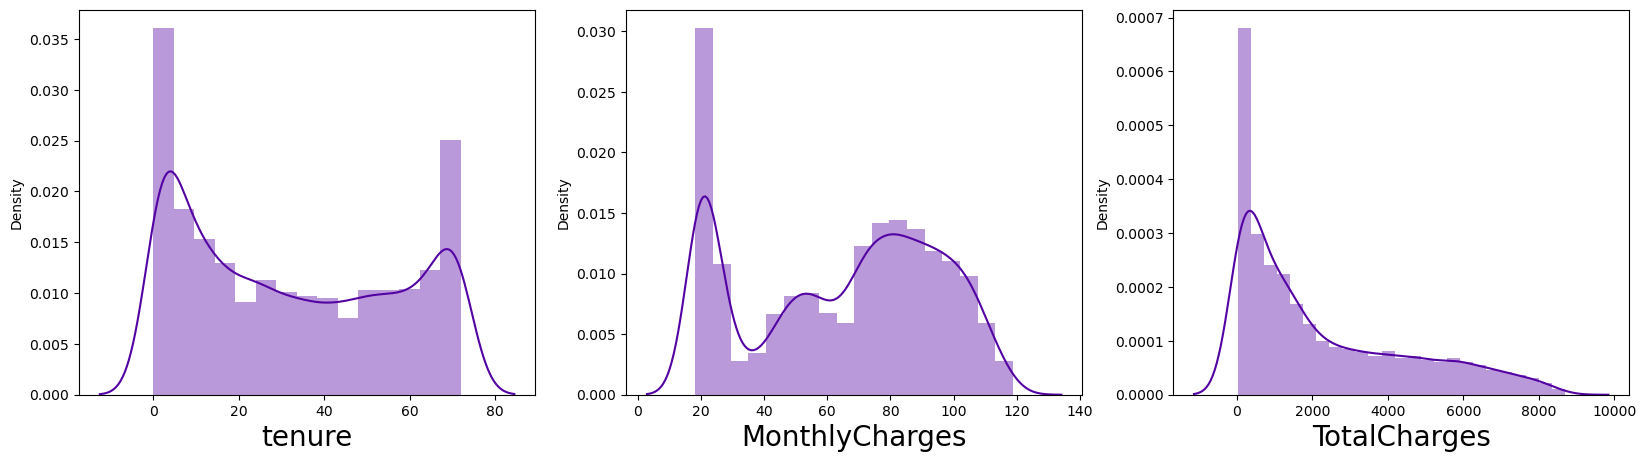

In [32]:
#Skewnes checking
plt.figure(figsize=(20,5),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Num:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [33]:
df.skew()

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges        0.960475
Churn               1.068139
dtype: float64

In [34]:
#we can see Totalcharges is skewed so we are goign to work on this
df['TotalCharges'] = np.log1p(df['TotalCharges'])

In [35]:
df.skew()

gender             -0.017381
SeniorCitizen       1.829987
Partner             0.061857
Dependents          0.870322
tenure              0.235542
MultipleLines       0.112816
InternetService     0.208589
OnlineSecurity      0.416182
OnlineBackup        0.181338
DeviceProtection    0.185268
TechSupport         0.401511
StreamingTV         0.026366
StreamingMovies     0.012488
Contract            0.626004
PaperlessBilling   -0.377214
PaymentMethod      -0.166267
MonthlyCharges     -0.224097
TotalCharges       -0.743926
Churn               1.068139
dtype: float64

In [36]:
#now we are going to work on corrleation
df.corr()


,gender,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001014,0.011081,0.006185,-0.005939,-0.001762,-0.015262,-0.012182,0.000449,-0.007045,-0.006461,-0.008781,0.000811,-0.011350,0.016304,-0.013158,-0.004020,-0.008763
Partner,-0.001014,1.000000,0.451659,0.377346,0.139827,0.003667,0.150589,0.152518,0.165752,0.126422,0.136443,0.128635,0.293042,-0.015776,-0.152069,0.094301,0.335297,-0.149135
Dependents,0.011081,0.451659,1.000000,0.157603,-0.027083,0.046608,0.151984,0.090502,0.080015,0.133303,0.046140,0.020525,0.241912,-0.112220,-0.038185,-0.116191,0.091002,-0.163459
tenure,0.006185,0.377346,0.157603,1.000000,0.340458,-0.026847,0.325762,0.370824,0.371062,0.323197,0.288737,0.296225,0.670728,0.005053,-0.367827,0.245251,0.832281,-0.351508
MultipleLines,-0.005939,0.139827,-0.027083,0.340458,1.000000,-0.106819,0.006599,0.116625,0.121633,0.010909,0.174225,0.180113,0.108553,0.164814,-0.174073,0.432246,0.434061,0.040175
InternetService,-0.001762,0.003667,0.046608,-0.026847,-0.106819,1.000000,-0.029421,0.035736,0.044563,-0.027019,0.107508,0.098435,0.102456,-0.137056,0.082669,-0.320525,-0.199183,-0.047366
OnlineSecurity,-0.015262,0.150589,0.151984,0.325762,0.006599,-0.029421,1.000000,0.184211,0.175061,0.284255,0.043553,0.054847,0.374556,-0.157024,-0.096968,-0.053347,0.223392,-0.288505
OnlineBackup,-0.012182,0.152518,0.090502,0.370824,0.116625,0.035736,0.184211,1.000000,0.186760,0.194841,0.146071,0.135587,0.280658,-0.012565,-0.124724,0.120391,0.311632,-0.194214
DeviceProtection,0.000449,0.165752,0.080015,0.371062,0.121633,0.044563,0.175061,0.186760,1.000000,0.239738,0.275710,0.287869,0.350077,-0.037485,-0.135664,0.164399,0.332417,-0.176770
TechSupport,-0.007045,0.126422,0.133303,0.323197,0.010909,-0.027019,0.284255,0.194841,0.239738,1.000000,0.160326,0.160334,0.425570,-0.112891,-0.104905,-0.008050,0.236422,-0.281654


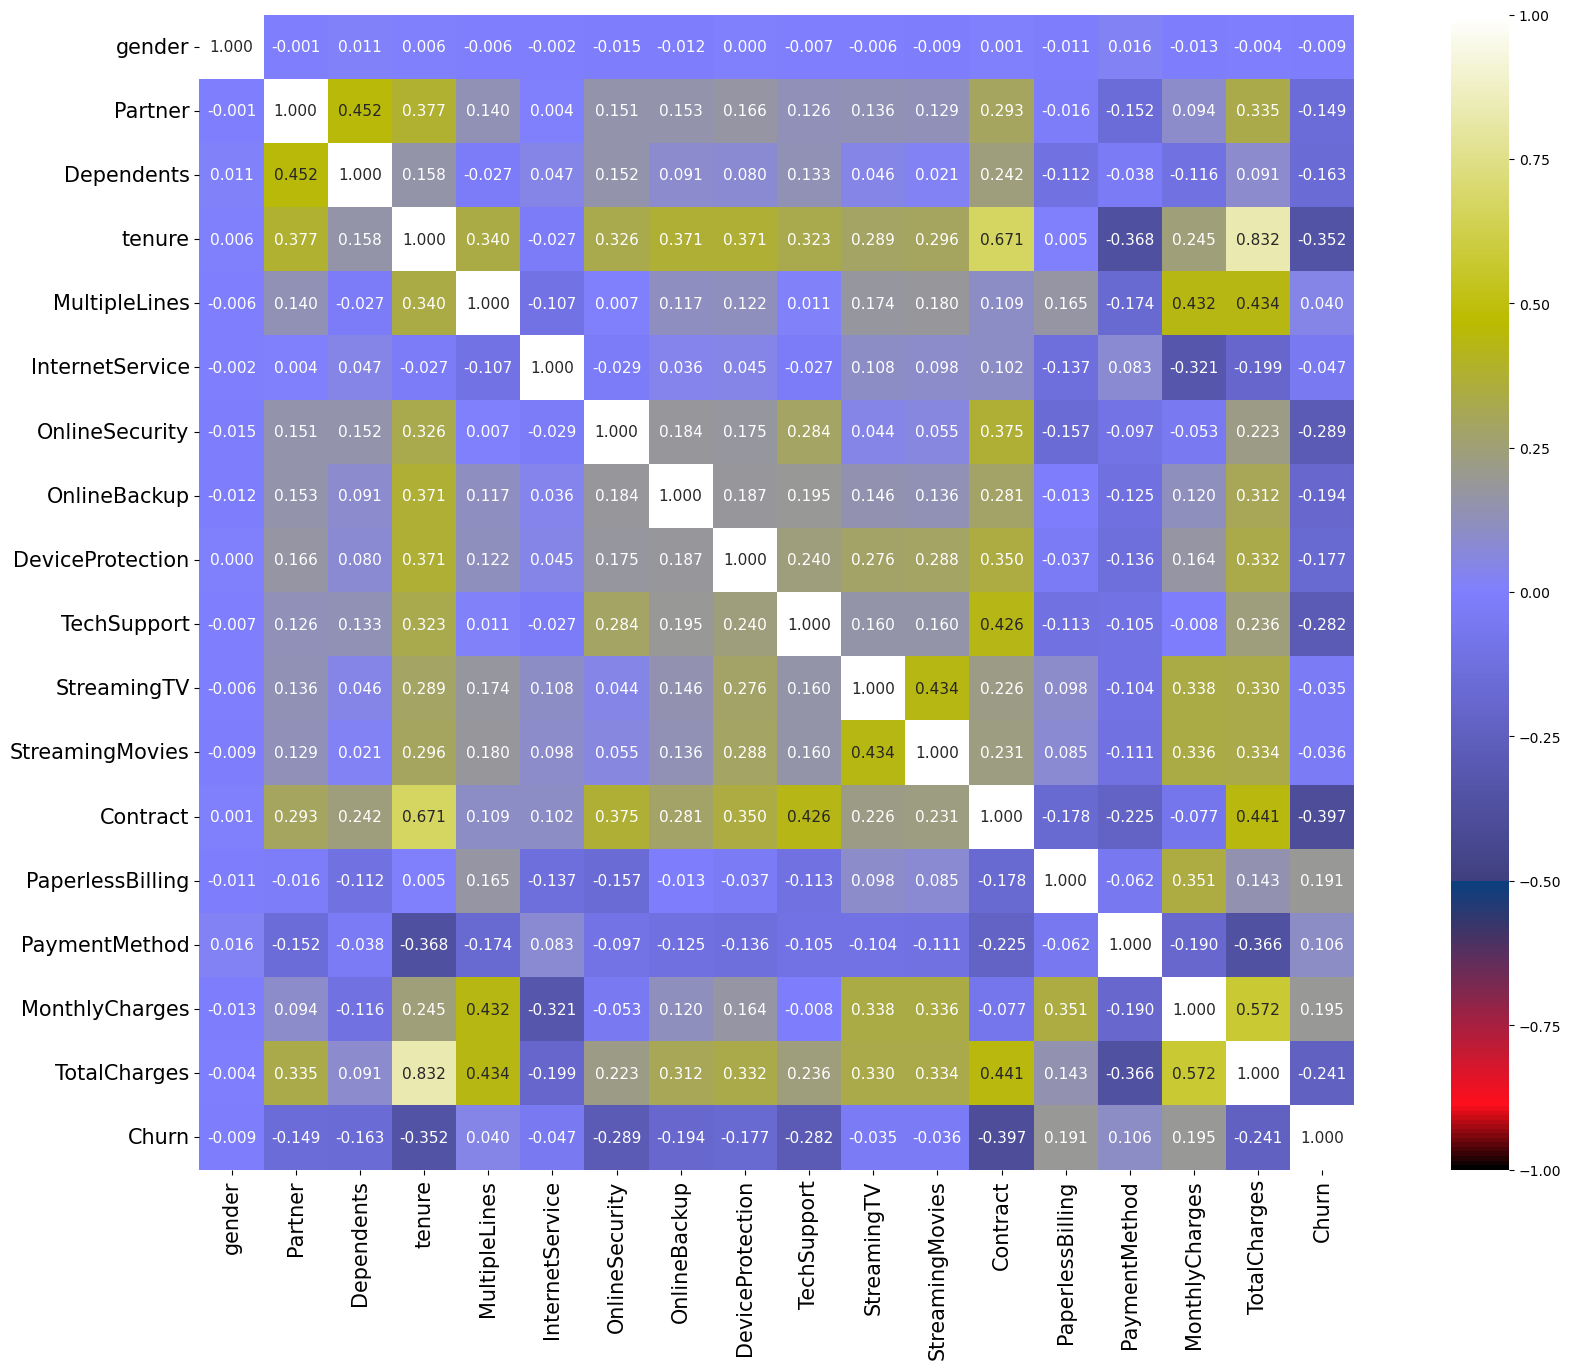

In [37]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':11}, cmap="gist_stern")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [38]:
#now we need to werok on Target Varibale
df.Churn.value_counts()

0    5164
1    1857
Name: Churn, dtype: int64

In [39]:
#its very imbvalanced so we need to balance this withe teh help of SMOTE
!pip install imblearn


In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
X = df.drop(['Churn'], axis =1)
Y = df['Churn']

In [42]:
OS = SMOTE()
X, Y = OS.fit_resample(X, Y)

In [43]:
Y.value_counts()

0    5164
1    5164
Name: Churn, dtype: int64

In [44]:
X.value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges
0       0.0            0        0           1       0              0                0               0             0                 0            0            0                0         0                 3              44.40           3.815512        3
1       1.0            0        0           1       2              1                0               0             0                 0            0            0                0         1                 2              74.40           4.322807        3
0       0.0            0        0           1       0              1                0               0             0                 0            2            2                0         0                 2              90.55           4.516885       

In [45]:
#now we are going to do Scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

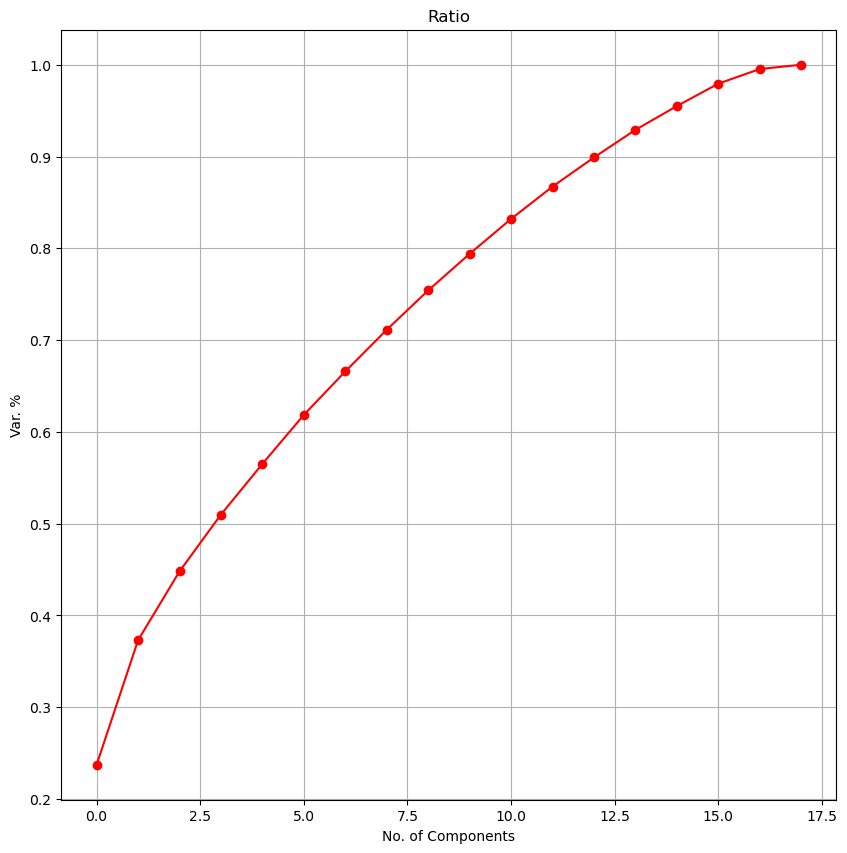

In [46]:
#PCA
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('No. of Components')
plt.ylabel('Var. %')
plt.title('Ratio')
plt.grid()

In [47]:
new = PCA(n_components=13)
new1 = new.fit_transform(X_scale)

In [48]:
new=pd.DataFrame(new1,columns=np.arange(13))

In [49]:
#Model Building 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(new, Y, random_state=99, test_size=.3)
print('Training feature:',X_train.shape)
print('Training target:',Y_train.shape)
print('Test feature:',X_test.shape)
print('Test target:',Y_test.shape)

Training feature: (7229, 13)
Training target: (7229,)
Test feature: (3099, 13)
Test target: (3099,)


In [53]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X_scale,Y,test_size = 0.3, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8050984188447886 on Random_state 147


In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=90, test_size=.3)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression


Accuracy Logistics Regression : 0.7889641819941917


Confusion matrix Logistics Regression : 
 [[1187  414]
 [ 240 1258]]


classification Logistics Regression 
               precision    recall  f1-score   support

           0       0.83      0.74      0.78      1601
           1       0.75      0.84      0.79      1498

    accuracy                           0.79      3099
   macro avg       0.79      0.79      0.79      3099
weighted avg       0.79      0.79      0.79      3099



In [55]:
#KNN neighbors 
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train) 
    y_pred=model.predict(X_test) 
    error = sqrt(mean_squared_error(Y_test,y_pred)) 
    rmse_val.append(error) 
    print('RMSE= ' , K , 'is:', error)

RMSE=  1 is: 0.4739077726312471
RMSE=  2 is: 0.4909638464774353
RMSE=  3 is: 0.47220244945918066
RMSE=  4 is: 0.4711762929777073
RMSE=  5 is: 0.47594609503848373
RMSE=  6 is: 0.47254400642930816
RMSE=  7 is: 0.47594609503848373
RMSE=  8 is: 0.4670491218491595
RMSE=  9 is: 0.4718606452526404
RMSE=  10 is: 0.46842888592412696
RMSE=  11 is: 0.4742481014166759
RMSE=  12 is: 0.46739444472210295
RMSE=  13 is: 0.4711762929777073
RMSE=  14 is: 0.46946104777622877
RMSE=  15 is: 0.47014789678693497
RMSE=  16 is: 0.4677395126500378
RMSE=  17 is: 0.46980459780228473
RMSE=  18 is: 0.4663577090024857
RMSE=  19 is: 0.4708337438281185
RMSE=  20 is: 0.465318663428635


In [56]:
#classification algorithm
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 18),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\*')
    print('*****************************************************************************************************************')

Classification LogisticRegression() is


Accuracy Score :
 0.7889641819941917


Confusion matrix : 
 [[1187  414]
 [ 240 1258]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.74      0.78      1601
           1       0.75      0.84      0.79      1498

    accuracy                           0.79      3099
   macro avg       0.79      0.79      0.79      3099
weighted avg       0.79      0.79      0.79      3099

\*
*****************************************************************************************************************
Classification SVC() is


Accuracy Score :
 0.8089706356889319


Confusion matrix : 
 [[1234  367]
 [ 225 1273]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.85      0.77      0.81      1601
           1       0.78      0.85      0.81      1498

    accuracy                           0.81      3099
   macro avg       0.81      0.81      0.

In [58]:
#CrossValidation
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 18),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, new, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\*')
    print('************************************************************************************************************')




Cross Validation LogisticRegression() :

Score : [0.74346563 0.74394966 0.78848015 0.79709443 0.81549637]
Mean Score : 0.777697249835337
Std deviation : 0.029092948536393697
\*
************************************************************************************************************


Cross Validation SVC() :

Score : [0.74298161 0.75169409 0.8286544  0.82372881 0.84842615]
Mean Score : 0.7990970140332702
Std deviation : 0.04315021253730886
\*
************************************************************************************************************


Cross Validation GaussianNB() :

Score : [0.71345595 0.72120039 0.79090029 0.80871671 0.80774818]
Mean Score : 0.7684043044425015
Std deviation : 0.042253120867991184
\*
************************************************************************************************************


Cross Validation DecisionTreeClassifier() :

Score : [0.69022265 0.7303969  0.79332043 0.77917676 0.78789346]
Mean Score : 0.7562020397113183
Std deviation 

In [60]:
#Hyper Tuning
from sklearn.model_selection import GridSearchCV
parm = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50,60], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,60,70]}


In [62]:
GCV = GridSearchCV(RandomForestClassifier(),parm,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV 1/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 1/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.798 total time=   0.0s
[CV 2/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 2/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.779 total time=   0.0s
[CV 3/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 3/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.802 total time=   0.0s
[CV 4/5; 1/168] START bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5
[CV 4/5; 1/168] END bootstrap=True, criterion=gini, max_depth=5, max_features=auto, n_estimators=5;, score=0.802 total time=   0.0s
[CV 5

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, 60],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 60, 70]},
             verbose=10)

In [63]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 60,
 'max_features': 'log2',
 'n_estimators': 70}

In [64]:
#now we are goign to check Final Model
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 60, max_depth=40 ,max_features='auto')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8367215230719587


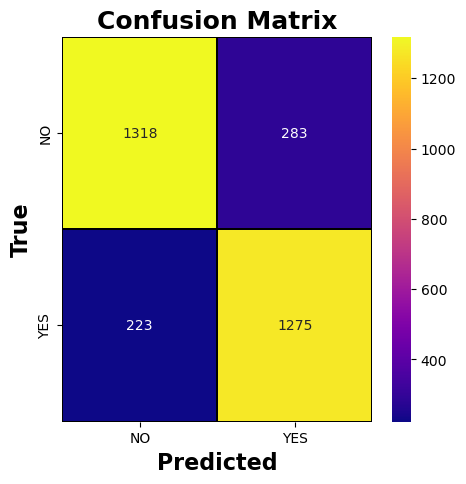

In [65]:
#Confusion Matrix for Final Model
Matrix = confusion_matrix(Y_test, y_pred)
x_labels = ["NO","YES"]
y_labels = ["NO","YES"]
fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)
plt.xlabel("Predicted",fontsize=16,fontweight='bold')
plt.ylabel("True",fontsize=16,fontweight='bold')
plt.title('Confusion Matrix',fontsize=18,fontweight='bold')
plt.show()


In [66]:
import joblib
joblib.dump(Final_mod,'Customer_Churn.pkl')

['Customer_Churn.pkl']